In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

2025-07-05 22:45:47.302255: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-05 22:45:47.819925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751735748.000096   71420 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751735748.051571   71420 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751735748.540273   71420 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 7s 1us/step
(60000, 28, 28) (60000,)


In [3]:
batch_size = 128
num_classes = 10
epochs = 10

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
batch_size = 128
num_classes = 10
epochs = 20

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [12]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 129ms/step - accuracy: 0.1127 - loss: 2.2986 - val_accuracy: 0.2863 - val_loss: 2.2489
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 136ms/step - accuracy: 0.2384 - loss: 2.2409 - val_accuracy: 0.5448 - val_loss: 2.1776
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - accuracy: 0.3692 - loss: 2.1727 - val_accuracy: 0.6386 - val_loss: 2.0803
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 120ms/step - accuracy: 0.4718 - loss: 2.0748 - val_accuracy: 0.6923 - val_loss: 1.9411
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 138ms/step - accuracy: 0.5465 - loss: 1.9390 - val_accuracy: 0.7346 - val_loss: 1.7516
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 57s 121ms/step - accuracy: 0.6098 - loss: 1.7557 - val_accuracy: 0.7695 - val_loss: 1.5171
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 123ms/step - accuracy: 0.6495 - loss: 1.5486 - val_accuracy: 0.7950 - val_loss: 1.2688
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 67s 142ms/step - accuracy: 0.6733 - loss: 1

The model has successfully trained
Saving the model as mnist.h5


In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4122947156429291
Test accuracy: 0.8896999955177307


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted Digit: 7


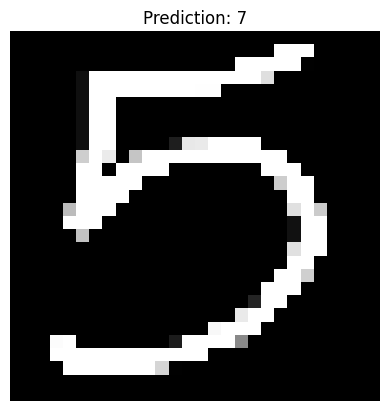

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import matplotlib.pyplot as plt

# Load trained MNIST model
model = load_model('mnist.h5')

# Load your image (change the filename accordingly)
img = cv2.imread('xoxo.jpeg', cv2.IMREAD_GRAYSCALE)

# Resize to 28x28
img = cv2.resize(img, (28, 28))

# Invert colors (MNIST is white digits on black background)
img = 255 - img

# Normalize to 0-1
img = img / 255.0

# Reshape to match model input (1 sample, 28x28, 1 channel)
img = img.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print(f'Predicted Digit: {predicted_digit}')

# Show the image with prediction
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f'Prediction: {predicted_digit}')
plt.axis('off')
plt.show()


In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2

# Load the trained model
model = load_model('mnist.h5')

# Load and preprocess the image
img = cv2.imread('d.jpeg', cv2.IMREAD_GRAYSCALE)  # Load in grayscale
img = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
img = img.astype('float32') / 255  # Normalize to [0, 1]
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = np.expand_dims(img, axis=-1)  # Add channel dimension (for grayscale)

# Predict the digit
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)

print("Predicted Digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Predicted Digit: 2


In [1]:
import streamlit as st
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
from PIL import Image

# Load trained MNIST model
model = load_model('mnist.h5')

st.title("Handwritten Digit Recognition")
st.write("Upload an image of a handwritten digit (MNIST-style, grayscale)")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Load image
    image = Image.open(uploaded_file).convert('L')  # convert to grayscale
    st.image(image, caption='Uploaded Image', use_column_width=True)
    
    # Preprocess image
    img = np.array(image)
    img = cv2.resize(img, (28, 28))
    img = 255 - img  # invert colors if needed
    img = img / 255.0  # normalize
    img = img.reshape(1, 28, 28, 1)
    
    # Prediction
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    
    st.subheader(f'Predicted Digit: {predicted_digit}')


2025-07-11 11:55:04.990771: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-11 11:55:05.364505: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752215105.551445  436344 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752215105.599585  436344 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752215105.987134  436344 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 